## 1. Loading and Understanding the Phishing Websites' dataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
tf.random.set_seed(9)

In [3]:
phishing_sites = pd.read_csv('Phishing.csv')

In [4]:
phishing_sites.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11045,11046,11047,11048,11049,11050,11051,11052,11053,11054
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1,...,1,-1,-1,1,-1,1,-1,1,-1,-1
URL_Length,1,1,0,0,0,0,0,0,0,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,-1,1,-1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,1,1,1,1,-1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1,...,-1,1,-1,1,-1,1,-1,-1,-1,-1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,1,1
Favicon,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,-1,1


In [5]:
phishing_sites.shape

(11055, 31)

In [6]:
phishing_sites.Result.unique()

array([-1,  1], dtype=int64)

In [7]:
phishing_sites.Result.value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

## 2. Further data investigation and preparing investigation reports

In [15]:
import matplotlib.pyplot as plt

In [16]:
distribution = phishing_sites.Result.value_counts()

[Text(0, 0.5, 'Class'), Text(0.5, 0, 'Number of Observations')]

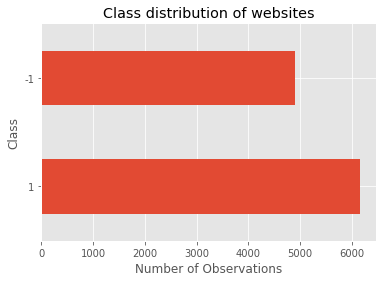

In [17]:
plt.style.use('ggplot')
ax = distribution.plot.barh(title = 'Class distribution of websites')
ax.set(ylabel = "Class", xlabel = "Number of Observations")

In [18]:
phishing_sites.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [19]:
phishing_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

## 3. Getting useful information from the dataset

In [20]:
phishing_sites['Result'] = phishing_sites['Result'].replace(-1, 0)

In [21]:
phishing_sites.Result.value_counts()

1    6157
0    4898
Name: Result, dtype: int64

In [24]:
cols_with_missing = [col for col in phishing_sites.columns
                     if phishing_sites[col].isnull().any()]

In [25]:
cols_with_missing

[]

In [ ]:
phishing_sites

In [26]:
from sklearn.model_selection import train_test_split
# Select target
y = phishing_sites.Result

# To keep things simple, we'll use only numerical predictors
melb_predictors = phishing_sites.drop(['Result'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [28]:
X_train

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
5033,1,-1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,-1,1,1,1,1,1
10307,1,1,1,-1,1,-1,0,0,-1,-1,...,1,-1,1,1,1,0,1,1,0,1
7563,-1,-1,1,1,1,-1,0,0,1,1,...,1,1,1,-1,1,-1,-1,1,1,-1
5911,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,1,-1,-1,1,0,1
9823,1,-1,1,1,1,1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,-1,-1,1,1,1
3264,1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,1,1,-1,1,-1,-1,1,1
9845,-1,1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,0,1,1,1,1
10799,-1,-1,1,1,1,-1,-1,0,-1,1,...,1,1,1,1,1,0,-1,1,1,1


In [30]:
X_valid

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
226,1,-1,1,1,1,-1,-1,1,1,-1,...,1,-1,1,-1,-1,-1,-1,1,0,1
2252,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,1,-1,1,-1,-1,1,0,1
2646,1,-1,1,1,1,-1,0,1,-1,1,...,1,1,1,1,-1,1,-1,1,1,1
6444,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,1,-1,1,1,-1,1,0,1
1387,1,-1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,-1,-1,1,1,1,-1,0,1,1,1,...,1,1,1,-1,1,-1,-1,1,1,1
8541,-1,-1,1,-1,1,-1,-1,-1,1,1,...,1,1,1,1,1,1,-1,1,1,1
6810,-1,-1,1,-1,1,-1,1,-1,-1,-1,...,1,-1,-1,-1,1,0,-1,1,1,1
4721,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
